# **7. 인공신경망 기초**

---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 7-5 다층 퍼셉트론으로 비선형 회귀 구현하기**

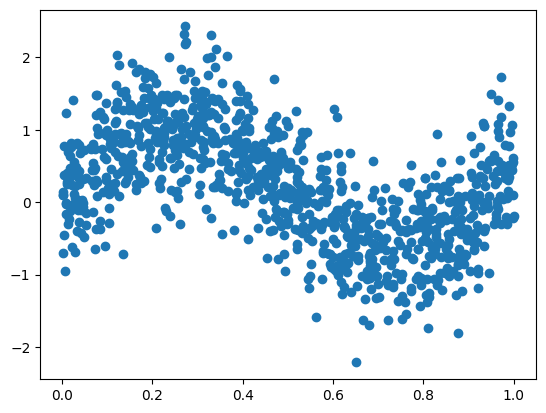

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [2]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx + 1 , nh1)
V = np.random.randn(nh1 + 1, nh2)
W = np.random.randn(nh2 + 1, ny)
learning_rate = 0.1

In [3]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [4]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산

In [5]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv

    input = np.array(x)
    input_1 = np.append(x, 1)                    # 편향 처리
    h1_out = sigmoid ( U.T.dot(input_1) )        # 은닉계층 1로 전파
    h1_deriv = h1_out * (1 - h1_out)             # 은닉계층 1의 미분

    h1_out_1 = np.append(h1_out, 1)              # 편향 처리
    h2_out = sigmoid ( V.T.dot(h1_out_1) )       # 은닉계층 2로 전파
    h2_deriv = h2_out * (1 - h2_out)             # 은닉계층 2의 미분

    h2_out_1 = np.append(h2_out, 1)              # 편향 처리
    y_out = sigmoid( W.T.dot(h2_out_1) )         # 출력계층으로 전파
    y_deriv = y_out * (1 - y_out)                # 출력계층의 미분

In [6]:
def compute_error(target):
    return y_out - target

In [7]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U

    y_delta = y_deriv * error                           # 출력 계층의 델타
    h2_out_1 = np.append(h2_out, 1)                     # 편향 처리
    dW = - learning_rate * np.outer(h2_out_1, y_delta)  # W의 수정
    W = W + dW


    h2_delta = h2_deriv * W.dot(y_delta)[:nh2]          # 은닉 계층 2의 델타
    h1_out_1 = np.append(h1_out, 1)                     # 편향 처리
    dV = - learning_rate * np.outer(h1_out_1, h2_delta) # V의 수정
    V = V + dV


    h1_delta = h1_deriv * V.dot(h2_delta)[:nh1]         # 은닉 계층 1의 델타
    input_1 = np.append(input, 1)                       # 편향 처리
    dU = - learning_rate * np.outer(input_1, h1_delta)  # U의 수정
    U = U + dU


In [8]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

In [9]:
loss = []
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
for i in range(300):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)

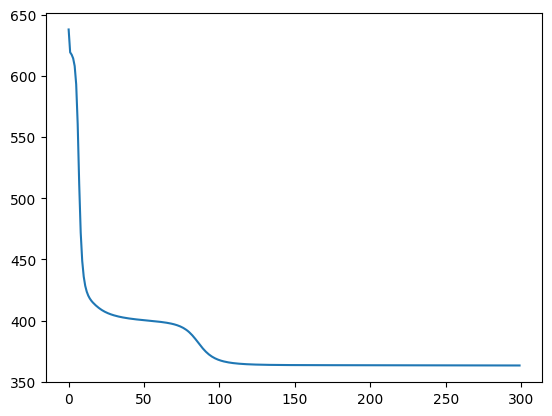

In [10]:
err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

In [11]:
def predict(X):
    y_hat = []
    for x in X:
        forward(x)
        y_hat.append(y_out)
    return y_hat

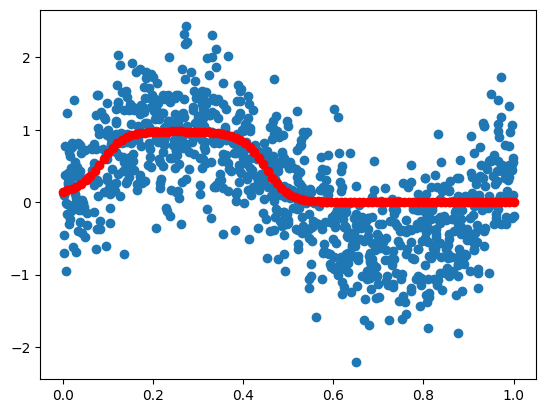

In [12]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.9 인공 신경망을 설계하고 훈련할 수 있는 도구: 텐서플로우

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf    # 텐서플로우는 주로 tf라는 별명을 사용한다
from tensorflow import keras

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy().reshape(-1,1)
y_label = df['y'].to_numpy()

In [ ]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6452
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6117
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6309
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5496
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4897
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4332
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4078
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4085
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4071
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4254
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3720
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4199
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4001
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3974
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


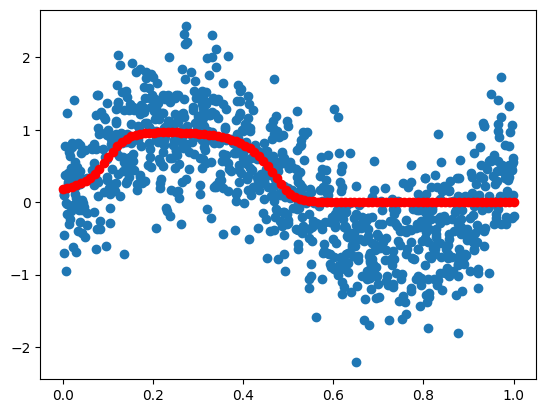

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')